In [1]:
from sklearn import datasets

In [2]:
wine=datasets.load_wine()
wine.keys()
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
X=wine.data
Y=wine.target
X.shape,Y.shape

((178, 13), (178,))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [5]:
X_train,Y_train,X_test,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_scaled,Y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [7]:
MSE=[1-x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [8]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

23

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

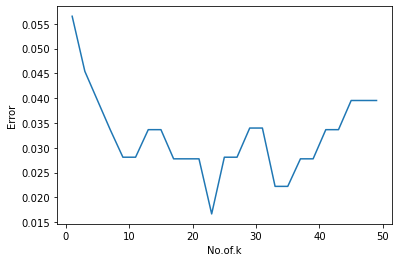

In [10]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [11]:
### The optimal number of neighbours is 23